# Heart Failure Clinical Records Data Set

## Task 1 Data Retrieving and Preparation 

Importing all required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style('whitegrid')

Reading the comma-separated values (csv) file provided into a DataFrame.


In [2]:
# Read comma-separated values (csv) files into the DataFrame.
heartFailureData_df= pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

In [3]:
#Get a copy of heartFailureData_df.copy
heart_df =heartFailureData_df.copy()
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# iterating the columns
print('Features in the dataset')
print('------------------------')
for col in heart_df.columns:
    print(col)

Features in the dataset
------------------------
age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


Remove whitespaces

In [5]:
# remove any whitespaces 
heart_df.columns = heart_df.columns.str.strip()

In [6]:
#for consistency remove decimals from age and platelets column
heart_df['age'] = heart_df['age'].astype(int)
heart_df['platelets'] = heart_df['platelets'].astype(int)

In [7]:
print('Shape of the data frame before dropping duplicates:',heart_df.shape)

Shape of the data frame before dropping duplicates: (299, 13)


In [8]:
#Drop any duplicates
heart_df = heart_df.drop_duplicates()

In [9]:
print('Shape of the data frame after removing duplicate values:',heart_df.shape)

Shape of the data frame after removing duplicate values: (299, 13)


In [10]:
heart_df.duplicated().sum()

0

Checking for null values

In [11]:
print("\nSum of null items in each column\n--------------------------------")
print(heart_df.isnull().sum())


Sum of null items in each column
--------------------------------
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Data types of the features

In [12]:
print(heart_df.dtypes)

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


Describing the continuous features checking for impossible values

In [13]:
# Describe and check for outliers and impossible values for age
print("Age:\n{}".format(heart_df['age'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Creatinine Phosphokinase
print("Creatinine Phosphokinase:\n{}".format(heart_df['creatinine_phosphokinase'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Ejection Fraction
print("Ejection Fraction:\n{}".format(heart_df['ejection_fraction'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Platelets
print("Platelets:\n{}".format(heart_df['platelets'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Serum Creatinine
print("Serum Creatinine:\n{}".format(heart_df['serum_creatinine'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Serum Sodium
print("Serum Sodium:\n{}".format(heart_df['serum_sodium'].describe().round(2)))

print("\n\n")
# Describe and check for outliers and impossible values for Time
print("Time:\n{}".format(heart_df['time'].describe().round(2)))

Age:
count    299.00
mean      60.83
std       11.89
min       40.00
25%       51.00
50%       60.00
75%       70.00
max       95.00
Name: age, dtype: float64



Creatinine Phosphokinase:
count     299.00
mean      581.84
std       970.29
min        23.00
25%       116.50
50%       250.00
75%       582.00
max      7861.00
Name: creatinine_phosphokinase, dtype: float64



Ejection Fraction:
count    299.00
mean      38.08
std       11.83
min       14.00
25%       30.00
50%       38.00
75%       45.00
max       80.00
Name: ejection_fraction, dtype: float64



Platelets:
count       299.00
mean     263358.03
std       97804.24
min       25100.00
25%      212500.00
50%      262000.00
75%      303500.00
max      850000.00
Name: platelets, dtype: float64



Serum Creatinine:
count    299.00
mean       1.39
std        1.03
min        0.50
25%        0.90
50%        1.10
75%        1.40
max        9.40
Name: serum_creatinine, dtype: float64



Serum Sodium:
count    299.00
mean     136.63
std 

Deal with outliers

In [14]:
heart_df = heart_df[heart_df['ejection_fraction']<70]
# Describe and check for outliers and impossible values for Ejection Fraction
print("Ejection Fraction:\n{}".format(heart_df['ejection_fraction'].describe().round(2)))

Ejection Fraction:
count    297.00
mean      37.84
std       11.47
min       14.00
25%       30.00
50%       38.00
75%       45.00
max       65.00
Name: ejection_fraction, dtype: float64


Print a concise summary of a DataFrame

In [15]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       297 non-null    int64  
 1   anaemia                   297 non-null    int64  
 2   creatinine_phosphokinase  297 non-null    int64  
 3   diabetes                  297 non-null    int64  
 4   ejection_fraction         297 non-null    int64  
 5   high_blood_pressure       297 non-null    int64  
 6   platelets                 297 non-null    int64  
 7   serum_creatinine          297 non-null    float64
 8   serum_sodium              297 non-null    int64  
 9   sex                       297 non-null    int64  
 10  smoking                   297 non-null    int64  
 11  time                      297 non-null    int64  
 12  DEATH_EVENT               297 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 32.5 KB


Display the claned data frame sample

In [16]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


## Task 2 Data Exploration

#### Exploring univariate visualisations

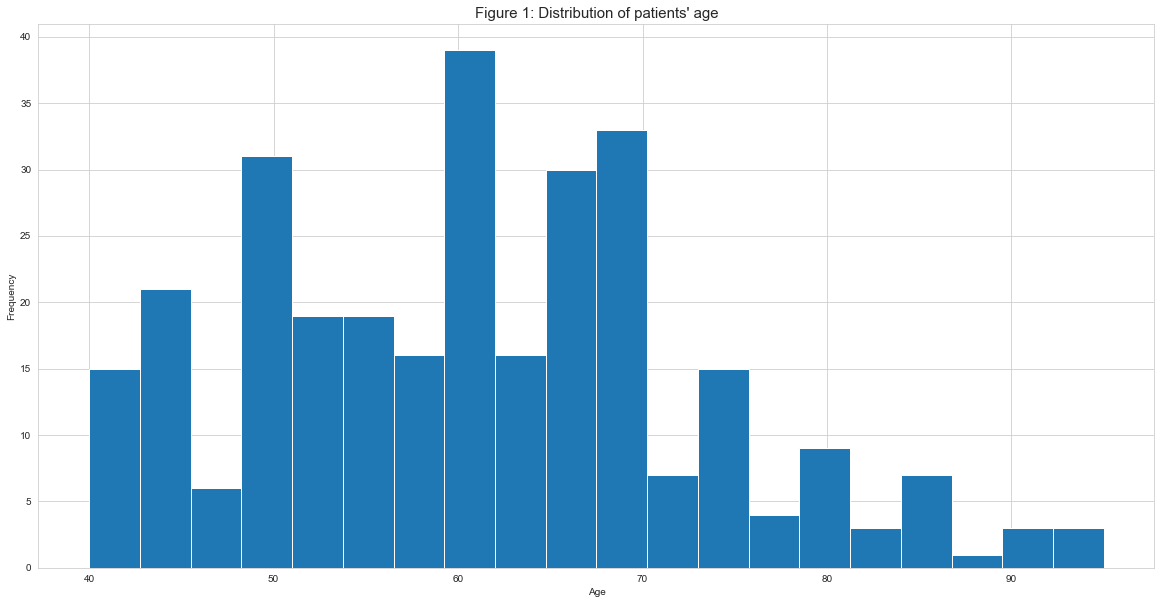

In [17]:
plt.figure(figsize = (20,10))
plt.hist(heart_df['age'], bins = 20);
plt.ylabel('Frequency');
plt.xlabel('Age');

plt.title('Figure 1: Distribution of patients\' age' , fontsize=15);
plt.show();

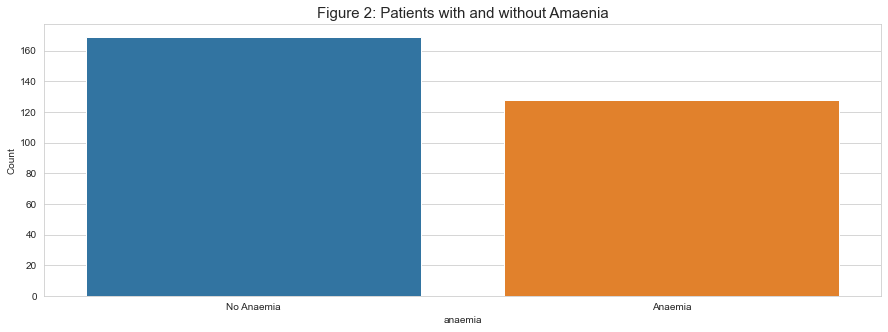

In [18]:
plt.figure(figsize = (15,5))
g=sns.countplot(x='anaemia',data=heart_df)
plt.ylabel('Count');
bars = ('no', 'yes');
g.set_xticklabels(['No Anaemia','Anaemia'])

fig = plt.title('Figure 2: Patients with and without Amaenia', fontsize = 15)

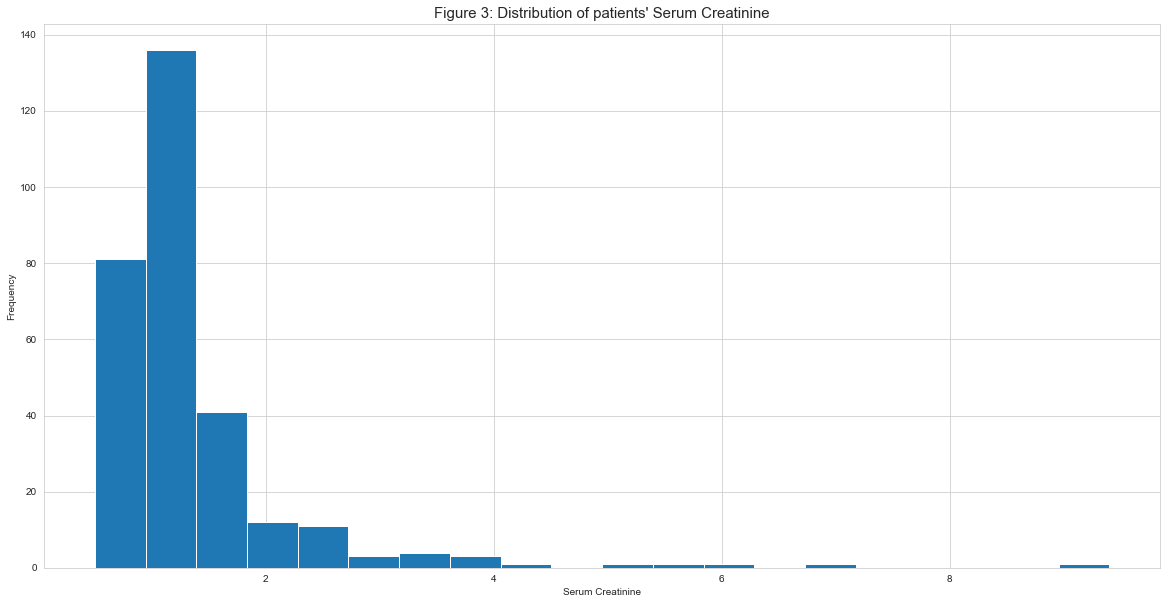

<Figure size 1440x720 with 0 Axes>

In [19]:
plt.figure(figsize = (20,10))
plt.hist(heart_df['serum_creatinine'], bins = 20);
plt.ylabel('Frequency');
plt.xlabel('Serum Creatinine');
plt.title('Figure 3: Distribution of patients\' Serum Creatinine', fontsize=15);

plt.figure(figsize = (20,10))
plt.show();

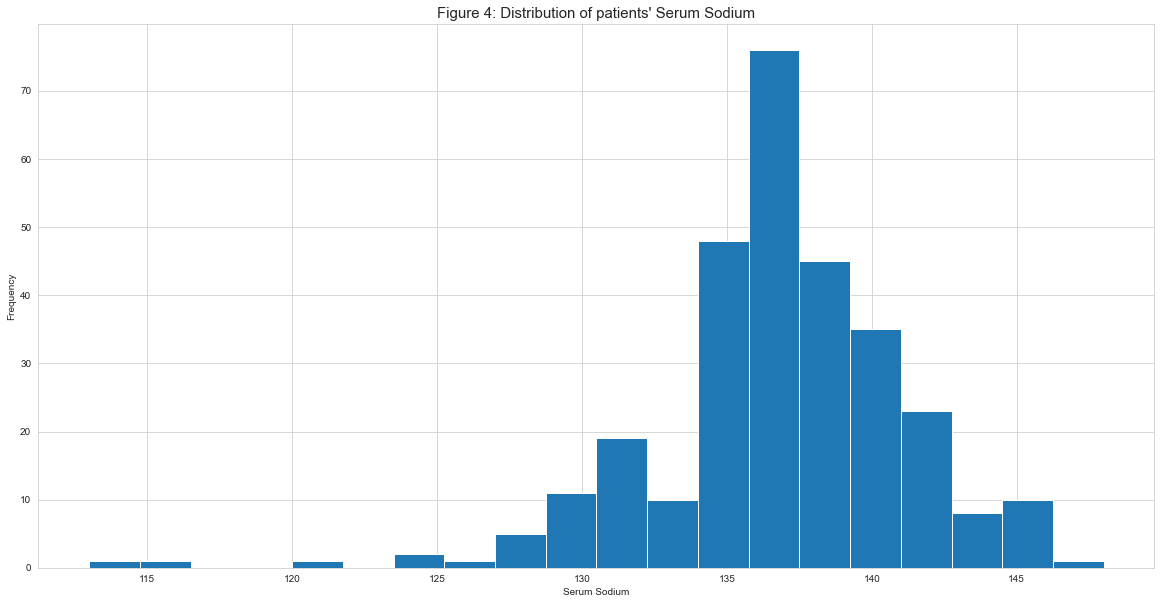

In [20]:
plt.figure(figsize = (20,10))
plt.hist(heart_df['serum_sodium'], bins = 20);
plt.xlabel('Serum Sodium');
plt.ylabel('Frequency');
plt.title('Figure 4: Distribution of patients\' Serum Sodium', fontsize=15);
plt.show();

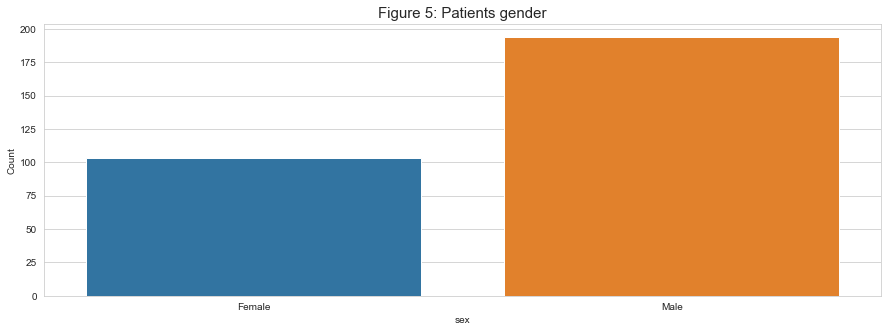

In [21]:
plt.figure(figsize = (15,5))
g=sns.countplot(x='sex',data=heart_df)
plt.ylabel('Count');
g.set_xticklabels(['Female','Male'])

fig = plt.title('Figure 5: Patients gender', fontsize = 15)

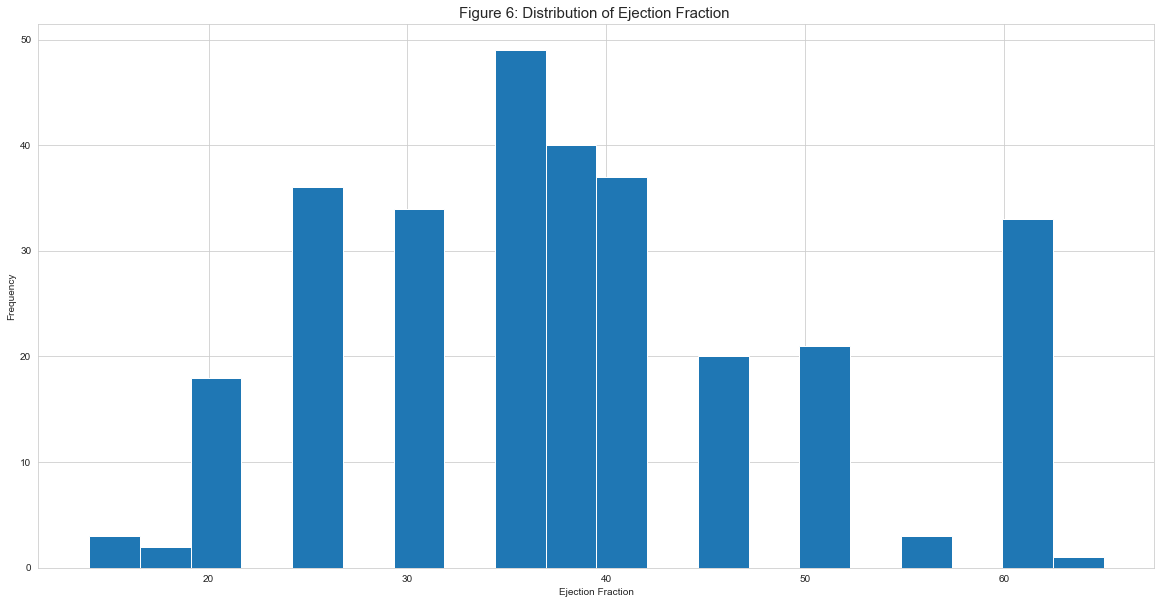

In [22]:
plt.figure(figsize = (20,10))
plt.hist(heart_df['ejection_fraction'], bins = 20);
plt.ylabel('Frequency');
plt.xlabel('Ejection Fraction');

plt.title('Figure 6: Distribution of Ejection Fraction ', fontsize=15);
plt.show();

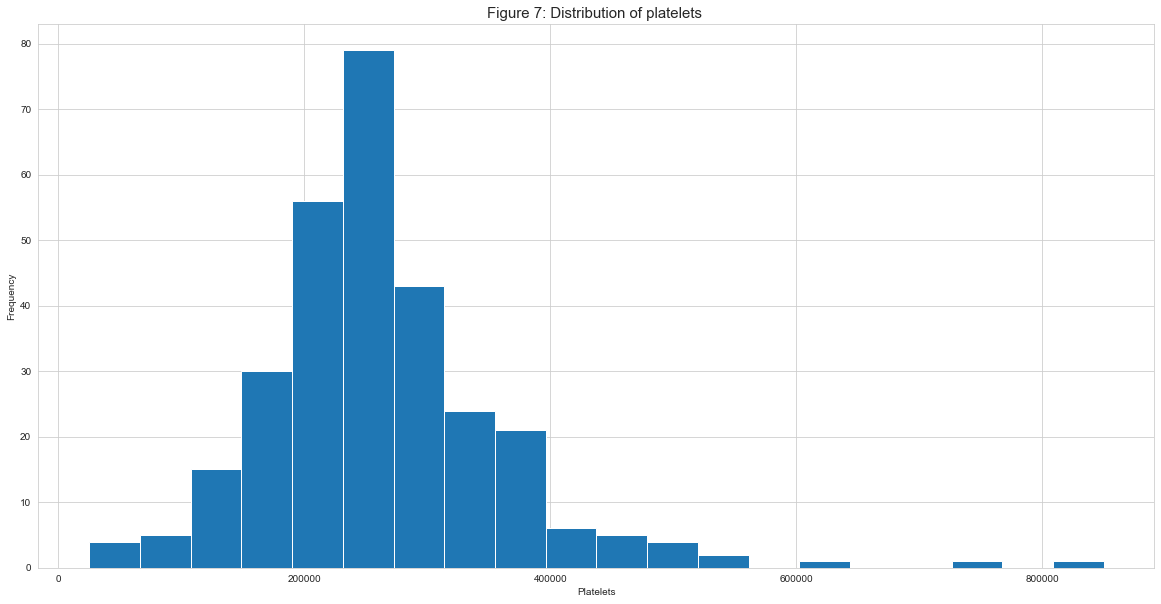

In [23]:
plt.figure(figsize = (20,10))
plt.hist(heart_df['platelets'], bins = 20);
plt.ylabel('Frequency');
plt.xlabel('Platelets');

plt.title('Figure 7: Distribution of platelets ', fontsize=15);
plt.show();

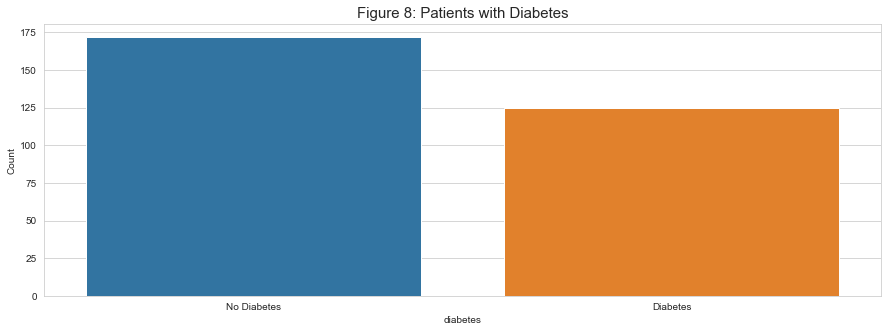

In [24]:
plt.figure(figsize = (15,5))
g=sns.countplot(x='diabetes',data=heart_df)
plt.ylabel('Count');
g.set_xticklabels(['No Diabetes','Diabetes'])

fig = plt.title('Figure 8: Patients with Diabetes', fontsize = 15)

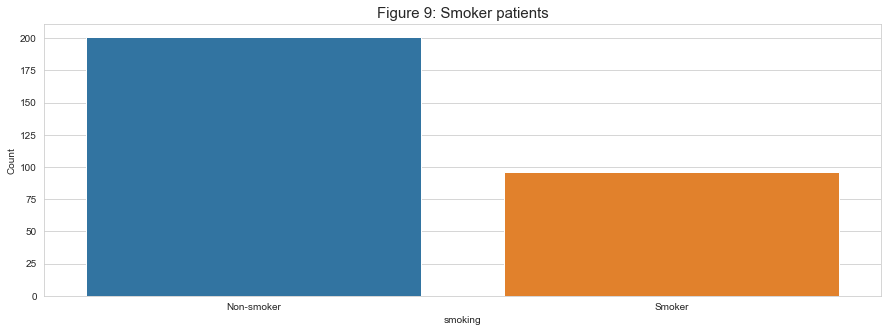

In [25]:
plt.figure(figsize = (15,5))
g=sns.countplot(x='smoking',data=heart_df)
plt.ylabel('Count');
g.set_xticklabels(['Non-smoker','Smoker'])

fig = plt.title('Figure 9: Smoker patients', fontsize = 15)

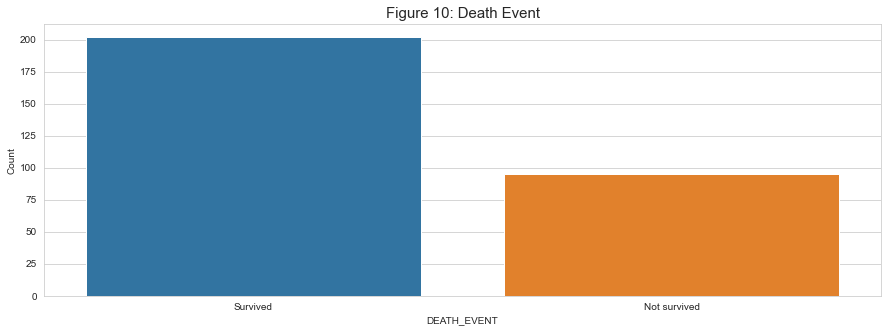

In [26]:
plt.figure(figsize = (15,5))
g=sns.countplot(x='DEATH_EVENT',data=heart_df)
plt.ylabel('Count');
g.set_xticklabels(['Survived','Not survived'])

fig = plt.title('Figure 10: Death Event', fontsize = 15)

### Exploring Feature Relationships 

Finding the pairwise correlation of all columns in the dataframe

In [27]:
heart_df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.086511,-0.082011,-0.107541,0.084509,0.093221,-0.055031,0.191569,-0.045528,0.057373,0.014583,-0.227873,0.255339
anaemia,0.086511,1.000000,-0.190798,-0.012010,0.032726,0.031050,-0.039589,0.025823,0.041949,-0.094417,-0.107192,-0.148080,0.059143
creatinine_phosphokinase,-0.082011,-0.190798,1.000000,-0.010119,-0.044131,-0.070146,0.023900,-0.013776,0.059600,0.079560,0.002055,-0.008914,0.063787
diabetes,-0.107541,-0.012010,-0.010119,1.000000,0.013474,-0.011024,0.089323,-0.029428,-0.089284,-0.166931,-0.151707,0.033835,0.000246
ejection_fraction,0.084509,0.032726,-0.044131,0.013474,1.000000,0.021671,0.085759,-0.086869,0.180255,-0.124787,-0.054795,0.046043,-0.284516
high_blood_pressure,0.093221,0.031050,-0.070146,-0.011024,0.021671,1.000000,0.055548,-0.043270,0.037080,-0.102811,-0.054573,-0.203749,0.071639
platelets,-0.055031,-0.039589,0.023900,0.089323,0.085759,0.055548,1.000000,-0.014142,0.062595,-0.131498,0.025668,0.013844,-0.043820
serum_creatinine,0.191569,0.025823,-0.013776,-0.029428,-0.086869,-0.043270,-0.014142,1.000000,-0.211363,0.044205,-0.012007,-0.189343,0.286439
serum_sodium,-0.045528,0.041949,0.059600,-0.089284,0.180255,0.037080,0.062595,-0.211363,1.000000,-0.026957,0.005215,0.087865,-0.196280
sex,0.057373,-0.094417,0.079560,-0.166931,-0.124787,-0.102811,-0.131498,0.044205,-0.026957,1.000000,0.443064,-0.015836,-0.000817


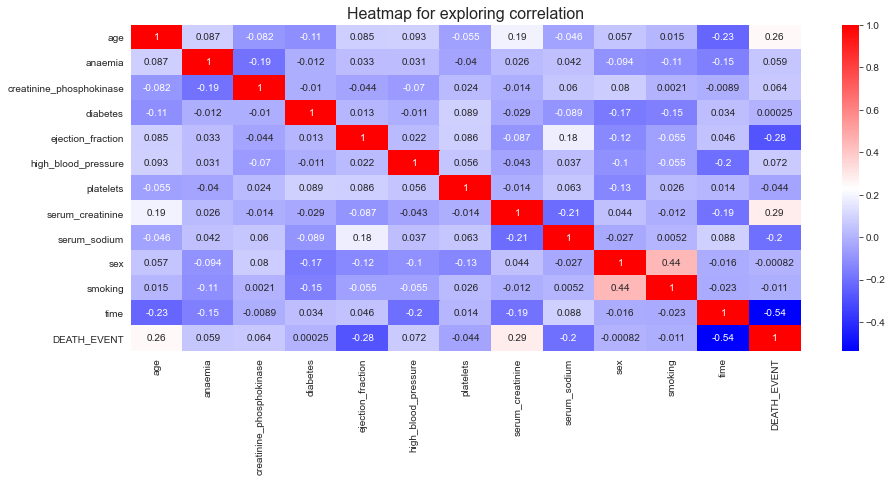

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(heart_df.corr(), annot=True, cmap='bwr')
plt.title('Heatmap for exploring correlation', fontsize=16)
plt.show()

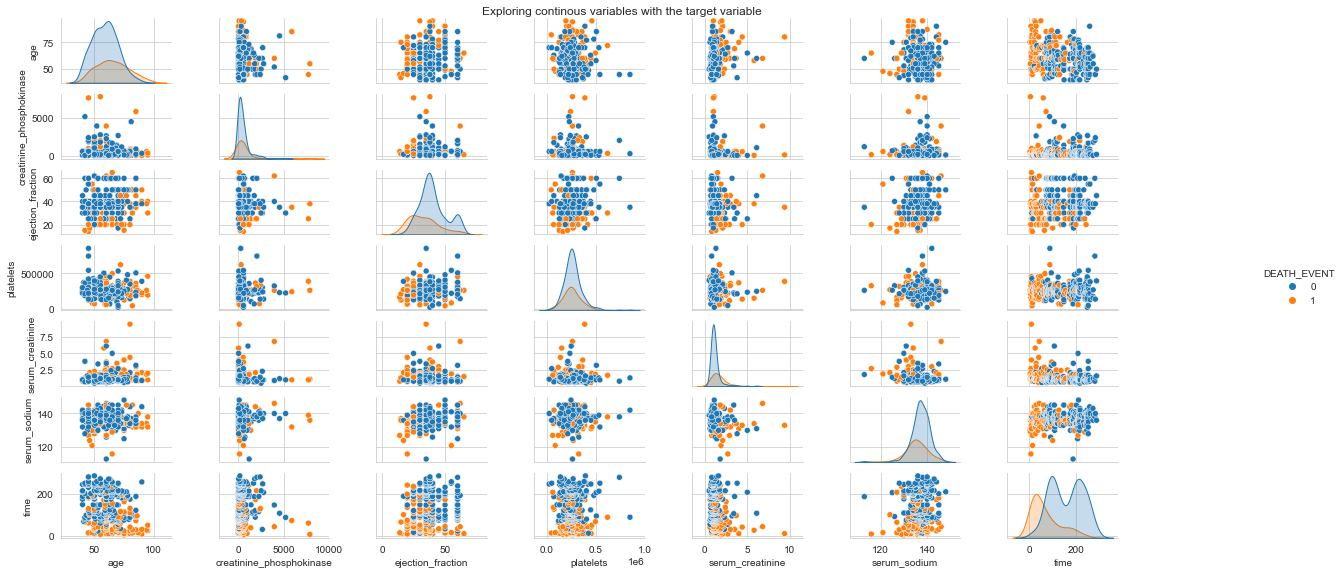

In [29]:
df =heart_df[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 
                        'serum_sodium', 'time','DEATH_EVENT']]
sp=sns.pairplot(df, height=1, hue='DEATH_EVENT')
sp.fig.suptitle("Exploring continous variables with the target variable", y=1)
plt.gcf().set_size_inches(20, 8)
plt.show()

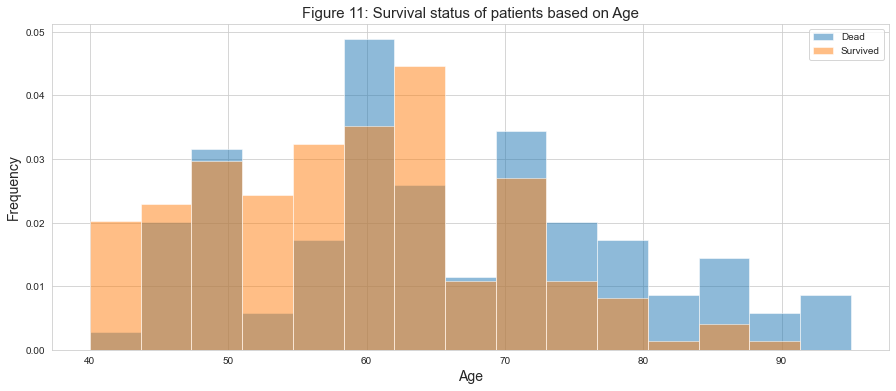

In [30]:
plt.figure(figsize = (15,6))
values = heart_df['DEATH_EVENT'].unique()
bin_range = (heart_df['age'].min(),heart_df['age'].max())

for i in values:
    plt.hist(heart_df[heart_df['DEATH_EVENT']==i]['age'],alpha=0.5,density=True,label=i,range=bin_range,bins=15)
plt.title('Figure 11: Survival status of patients based on Age', fontsize=15)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
Legend=plt.legend()
Legend.get_texts()[1].set_text('Survived')
Legend.get_texts()[0].set_text('Dead')

plt.show()

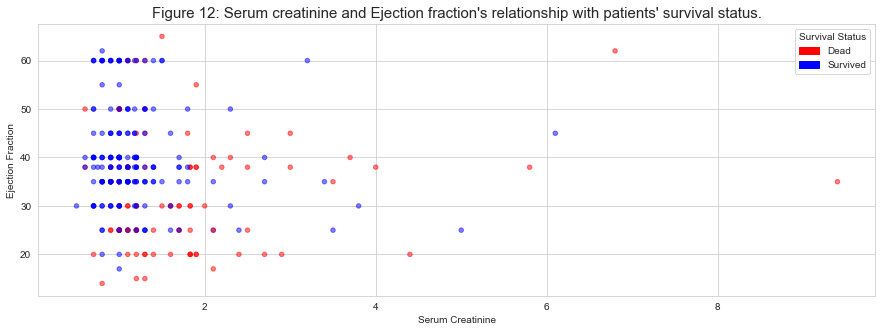

In [31]:
colors = {0:'blue', 1:'red'}

heart_df.plot.scatter('serum_creatinine','ejection_fraction',alpha=0.5, c=heart_df['DEATH_EVENT'].map(colors)) 
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.title("Figure 12: Serum creatinine and Ejection fraction's relationship with patients' survival status.", fontsize = 15)
rp=mpatches.Circle((0.5, 0.5), radius = 0.25, color='red', label='Dead')
bp=mpatches.Circle((0.5, 0.5), radius = 0.25, color='blue', label='Survived')
plt.legend(handles=[rp,bp],loc='upper right', title="Survival Status")
plt.gcf().set_size_inches(15, 5)

plt.show()

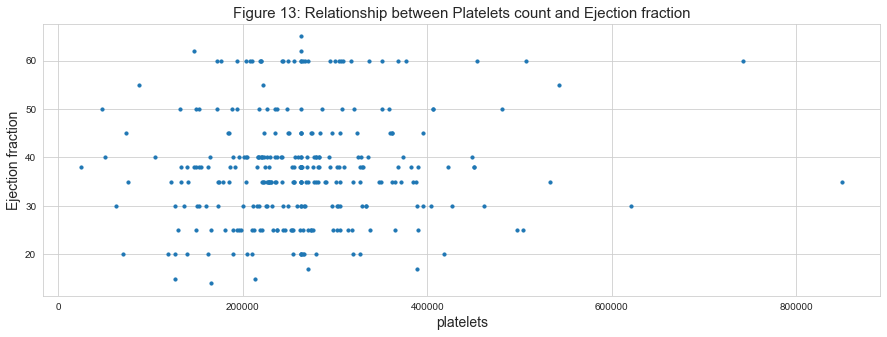

In [32]:
heart_df.plot.scatter('platelets','ejection_fraction',s=10) 
plt.title('Figure 13: Relationship between Platelets count and Ejection fraction', fontsize=15)
plt.ylabel('Ejection fraction', fontsize =14)
plt.xlabel('platelets', fontsize =14)
plt.gcf().set_size_inches(15, 5)

plt.show()

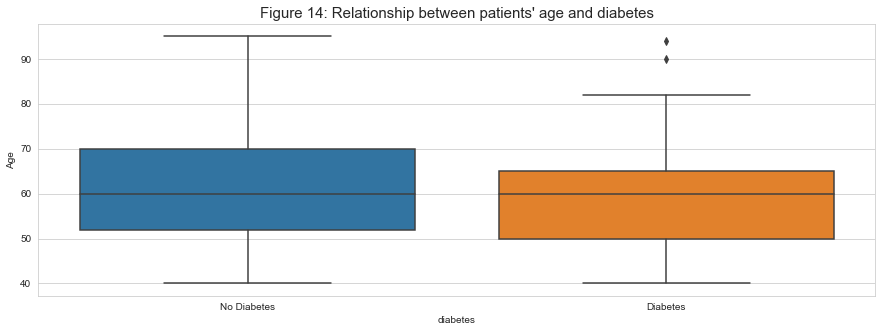

In [33]:
plt.figure(figsize = (15,5))
ax= sns.boxplot(x = 'diabetes', y = 'age', data = heart_df)
plt.ylabel('Age');
ax.set_xticklabels(['No Diabetes','Diabetes'])

fig = plt.title('Figure 14: Relationship between patients\' age and diabetes', fontsize = 15)

Diabetic patients also suffering from high blood pressure: 43
Diabetic patients not suffering from high blood pressure: 82


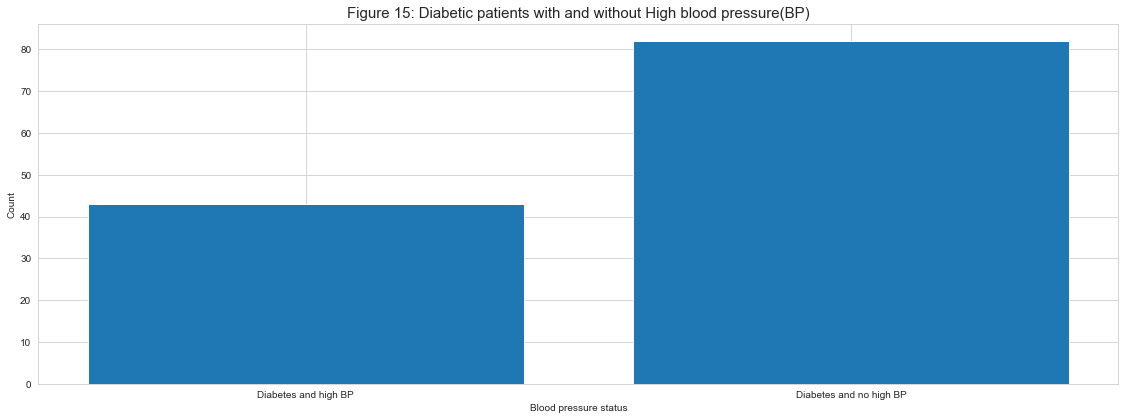

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig = plt.title('Figure 15: Diabetic patients with and without High blood pressure(BP)', fontsize = 15)

diab_bp = heart_df[(heart_df['diabetes'] == 1) & (heart_df['high_blood_pressure']== 1)]['diabetes'].count()
diab_no_bp = heart_df[(heart_df['diabetes'] == 1) & (heart_df['high_blood_pressure']== 0)]['diabetes'].count()
xlabel = ['Diabetes and high BP', 'Diabetes and no high BP']

xval = [diab_bp, diab_no_bp]
ax.bar(xlabel,xval)
plt.gcf().set_size_inches(15, 5)

print('Diabetic patients also suffering from high blood pressure:', diab_bp)
print('Diabetic patients not suffering from high blood pressure:', diab_no_bp)
plt.xlabel('Blood pressure status');
plt.ylabel('Count');
plt.show()

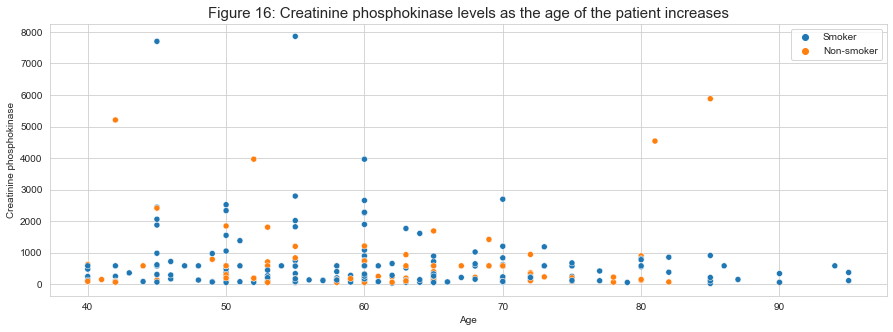

In [35]:
sns.scatterplot(x='age',y='creatinine_phosphokinase',data=heart_df, hue = 'smoking')
plt.xlabel('Age');
plt.ylabel('Creatinine phosphokinase');
fig = plt.title('Figure 16: Creatinine phosphokinase levels as the age of the patient increases', fontsize = 15)
plt.gcf().set_size_inches(15, 5)
Legend=plt.legend()
Legend.get_texts()[1].set_text('Non-smoker')
Legend.get_texts()[0].set_text('Smoker')


plt.show()

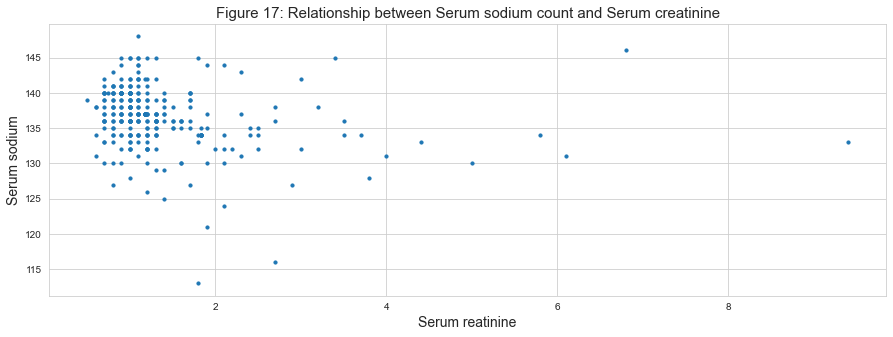

In [36]:
heart_df.plot.scatter('serum_creatinine','serum_sodium',s=10) 
plt.title('Figure 17: Relationship between Serum sodium count and Serum creatinine', fontsize=15)
plt.ylabel('Serum sodium', fontsize =14)
plt.xlabel('Serum reatinine', fontsize =14)
plt.gcf().set_size_inches(15, 5)

plt.show()

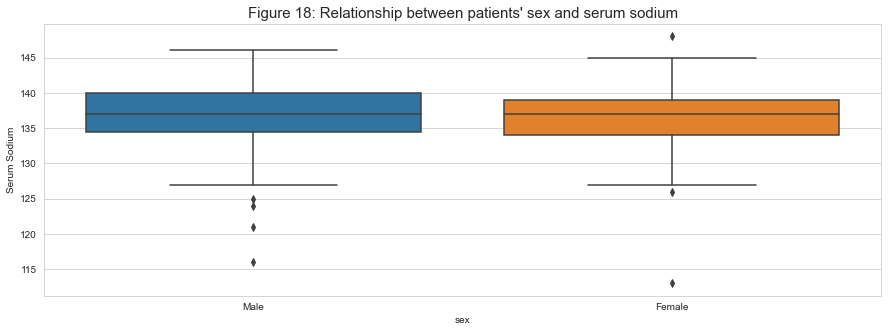

In [37]:
plt.figure(figsize = (15,5))
ax= sns.boxplot(x = 'sex', y = 'serum_sodium', data = heart_df)
plt.ylabel('Serum Sodium');
ax.set_xticklabels(['Male','Female'])

fig = plt.title('Figure 18: Relationship between patients\' sex and serum sodium', fontsize = 15)

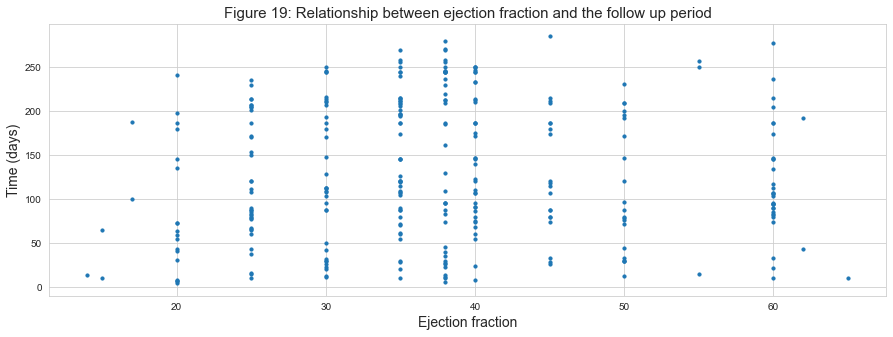

In [38]:
heart_df.plot.scatter('ejection_fraction','time',s=10) 
plt.title('Figure 19: Relationship between ejection fraction and the follow up period', fontsize=15)
plt.xlabel('Ejection fraction', fontsize =14)
plt.ylabel('Time (days)', fontsize =14)
plt.gcf().set_size_inches(15, 5)

plt.show()

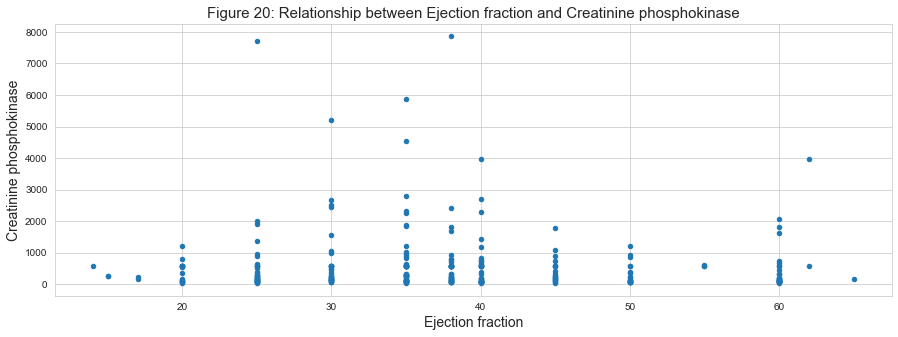

In [39]:
heart_df.plot.scatter('ejection_fraction','creatinine_phosphokinase') 
plt.title('Figure 20: Relationship between Ejection fraction and Creatinine phosphokinase', fontsize=15)
plt.xlabel('Ejection fraction', fontsize =14)
plt.ylabel('Creatinine phosphokinase', fontsize =14)
plt.gcf().set_size_inches(15, 5)

plt.show()

Number of male patients death: 62
Number of female patients death: 33


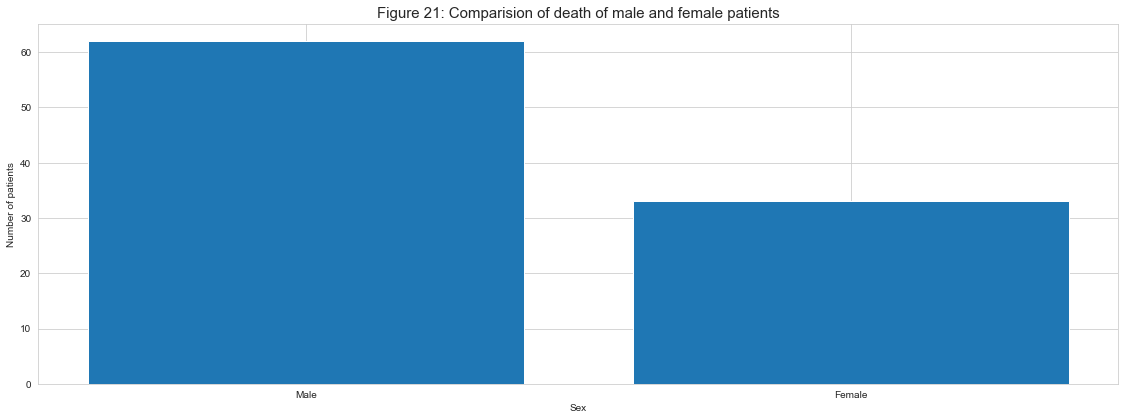

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig = plt.title('Figure 21: Comparision of death of male and female patients', fontsize = 15)

maledeath = heart_df[(heart_df['DEATH_EVENT'] == 1) & (heart_df['sex']== 1)]['sex'].count()
femaledeath = heart_df[(heart_df['DEATH_EVENT'] == 1) & (heart_df['sex']== 0)]['sex'].count()
xlabel = ['Male', 'Female']

xval = [maledeath, femaledeath]
ax.bar(xlabel,xval)
plt.gcf().set_size_inches(15, 5)

print('Number of male patients death:', maledeath)
print('Number of female patients death:', femaledeath)
plt.xlabel('Sex');
plt.ylabel('Number of patients');
plt.show()

## Task 3 Data Modelling

In [41]:
# drop the time column
heart_df = heart_df.drop(['time'],axis=1)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,1


In [42]:
#split to train and test

In [43]:
from sklearn.model_selection import train_test_split
df_KNN = heart_df.copy()
# dropping target feature
X = df_KNN.drop(columns=['DEATH_EVENT'])
Y = df_KNN['DEATH_EVENT']

#Convert dataframe to numpy arrays. 
X=X.to_numpy()
Y=Y.to_numpy()
print(X.shape,Y.shape)

# splitting the dataset into training and testing sets, 80% of data is used for training and 20% used for testing
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
Xtrain,Xtest,Ytrain,Ytest = xtrain,xtest,ytrain,ytest

(297, 11) (297,)


In [44]:
Xtrain.shape

(237, 11)

### K-Nearest Neighbour

In [45]:
#importing required modules
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import math 

In [46]:
#Feature selection 
#reasonable k value selected

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pylab as plt

from sklearn.utils import shuffle

col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

print('Scores with selected features in the first run')
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    xtrain, xtest, ytrain, ytest = train_test_split(newData, Y, test_size=0.20, random_state=1)
    clf = KNeighborsClassifier(3)
    fit = clf.fit(xtrain, ytrain)
    cur_Score = clf.score(xtest, ytest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=5)

print('-----------------------------------------------')
print('Scores with selected features in the second run')
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    xtrain, xtest, ytrain, ytest = train_test_split(newData, Y, test_size=0.20, random_state=1)
    clf = KNeighborsClassifier(3)
    fit = clf.fit(xtrain, ytrain)
    cur_Score = clf.score(xtest, ytest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
        
col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=8)

print('-----------------------------------------------')
print('Scores with selected features in the third run')
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    xtrain, xtest, ytrain, ytest = train_test_split(newData, Y, test_size=0.20, random_state=1)
    clf = KNeighborsClassifier(3)
    fit = clf.fit(xtrain, ytrain)
    cur_Score = clf.score(xtest, ytest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        
    
    
col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=9)

print('-----------------------------------------------')
print('Scores with selected features in the fourth run')
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    xtrain, xtest, ytrain, ytest = train_test_split(newData, Y, test_size=0.20, random_state=1)
    clf = KNeighborsClassifier(3)
    fit = clf.fit(xtrain, ytrain)
    cur_Score = clf.score(xtest, ytest)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Scores with selected features in the first run
Score with 1 selected features: 0.5166666666666667
Score with 2 selected features: 0.5166666666666667
Score with 3 selected features: 0.55
Score with 4 selected features: 0.55
Score with 5 selected features: 0.55
Score with 6 selected features: 0.55
Score with 7 selected features: 0.55
Score with 8 selected features: 0.5666666666666667
Score with 9 selected features: 0.5666666666666667
-----------------------------------------------
Scores with selected features in the second run
Score with 1 selected features: 0.7
Score with 2 selected features: 0.7
Score with 3 selected features: 0.75
Score with 4 selected features: 0.75
Score with 5 selected features: 0.7666666666666667
Score with 6 selected features: 0.7666666666666667
Score with 7 selected features: 0.7666666666666667
-----------------------------------------------
Scores with selected features in the third run
Score with 1 selected features: 0.5166666666666667
Score with 2 selected f

In [48]:
xtrain.shape

(237, 7)

In [49]:
print('Features selected')
print('-----------------')
for i in new_Ind:
    print(df_KNN.columns[i])
    

Features selected
-----------------
serum_creatinine
ejection_fraction
age
anaemia
sex
diabetes
high_blood_pressure


In [50]:
# selectnig a k value

In [51]:
from sklearn.neighbors import KNeighborsRegressor
maxk=15
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(xtrain, ytrain) 
ypredict = model.predict(xtest)
print('With selected k = ', 3, ' MSE sklearn KNN =',mean_squared_error(ytest,ypredict))

print ('Error for all values of K with sklearn KNN')
print('-------------------------------------------')

allError = []
for k in range(1,maxk):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(xtrain, ytrain) 
    ypredict = model.predict(xtest)
    
    curError = mean_squared_error(ytest,ypredict)
    
    allError.append(curError)
    print('MSE value when k is ' , k , 'is:', curError)
    

#Find the best results now.
minK = np.argmin(allError)
print("Min K = ", minK+1, ", Min Error = ", allError[minK])

With selected k =  3  MSE sklearn KNN = 0.16296296296296298
Error for all values of K with sklearn KNN
-------------------------------------------
MSE value when k is  1 is: 0.25
MSE value when k is  2 is: 0.15
MSE value when k is  3 is: 0.16296296296296298
MSE value when k is  4 is: 0.16875
MSE value when k is  5 is: 0.17866666666666664
MSE value when k is  6 is: 0.1578703703703704
MSE value when k is  7 is: 0.15714285714285714
MSE value when k is  8 is: 0.15703125
MSE value when k is  9 is: 0.15226337448559674
MSE value when k is  10 is: 0.1518333333333333
MSE value when k is  11 is: 0.15812672176308543
MSE value when k is  12 is: 0.15254629629629635
MSE value when k is  13 is: 0.154043392504931
MSE value when k is  14 is: 0.15399659863945578
Min K =  2 , Min Error =  0.15


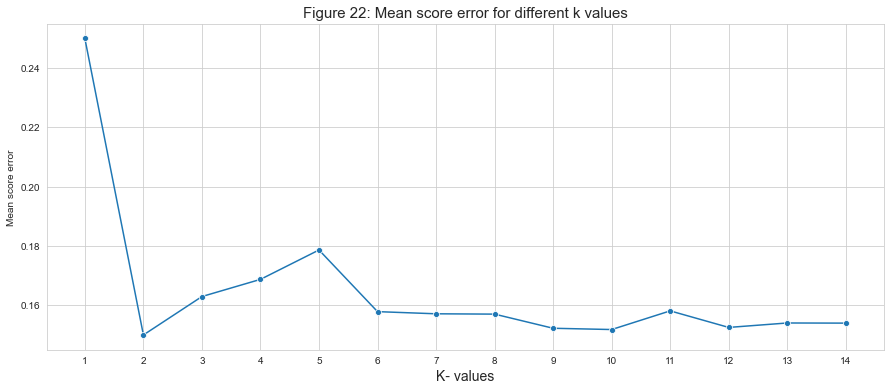

The K value of 2 , with Min Error =  0.15


In [52]:
k = list(range(1,maxk))
plt.figure(figsize=(15,6))
plt.xticks(range(1,maxk))
plt.title('Figure 22: Mean score error for different k values', fontsize=15)
sns.lineplot(data=allError, y=allError, x=k, marker='o')
plt.xlabel('K- values', fontsize = 14);
plt.ylabel('Mean score error');
plt.show()
print("The K value of", minK+1, ", with Min Error = ", allError[minK])

In [53]:
#Selecting the P-value

In [54]:
for cur in range(1, 4):
    clf = KNeighborsClassifier(n_neighbors=minK+1, p=cur)
    fit = clf.fit(xtrain, ytrain)
    cur_Score = clf.score(xtest, ytest)
    print("Score with P value of "+ str(cur) + ": "  + str(cur_Score))

Score with P value of 1: 0.7666666666666667
Score with P value of 2: 0.7666666666666667
Score with P value of 3: 0.75


In [55]:
# K-neighbours classifier

In [56]:
clf = KNeighborsClassifier(n_neighbors=minK+1, p=2,
                     weights='uniform', leaf_size=30)
fit =clf.fit(xtrain, ytrain)
KNN_predicted = fit.predict(xtest)
cm = confusion_matrix(ytest, KNN_predicted)
print('Confusion matrix')
print(cm)

print('\n classification score',clf.score(xtest, ytest))
print()
print(classification_report(ytest, KNN_predicted))

Confusion matrix
[[40  2]
 [12  6]]

 classification score 0.7666666666666667

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.75      0.33      0.46        18

    accuracy                           0.77        60
   macro avg       0.76      0.64      0.66        60
weighted avg       0.76      0.77      0.73        60



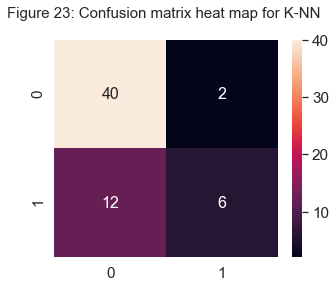

In [57]:
# confusion matrix heat map
knnhm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(5,4))
sns.set(font_scale=1.4) # for label size
sns.heatmap(knnhm, annot=True, annot_kws={"size": 16}) # font size
plt.title('Figure 23: Confusion matrix heat map for K-NN \n', fontsize=15)
plt.show()

In [58]:
#k-fold cross validation
irisInstances = df_KNN[[ 'serum_creatinine','ejection_fraction','age','anaemia']]
irisTarget= df_KNN['DEATH_EVENT']
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=6, shuffle=True)

In [59]:
#KFlod cross validation
sumScore=0
for k, (train_index, test_index) in enumerate(kf.split(irisInstances)):
 
    X_train, X_test = irisInstances.iloc[train_index], irisInstances.iloc[test_index]
    y_train, y_test = irisTarget.iloc[train_index], irisTarget.iloc[test_index]
     
    clf.fit(X_train, y_train)
    sumScore+= clf.score(X_test, y_test)
    print("For fold {0} score is {1:.5f}".format(k, clf.score(X_test, y_test)))

print("The average score is", sumScore/(k+1))


For fold 0 score is 0.66667
For fold 1 score is 0.68333
For fold 2 score is 0.66102
For fold 3 score is 0.67797
For fold 4 score is 0.69492
The average score is 0.6767796610169492


### Decision Tree Classifier

In [60]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,1


In [61]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [62]:
print(Xtrain.shape)

(237, 11)


In [63]:
#determining the max_depth parameter
maxdepthlst =[]
for depth in range(1,21):
    clf = DecisionTreeClassifier(random_state= 0, max_depth=depth)
    clf.fit(Xtrain,Ytrain)
    ypred = clf.predict(Xtest)
    print(f"For max_depth of {depth} Accuracy is:",metrics.accuracy_score(Ytest, ypred))
    maxdepthlst.append(metrics.accuracy_score(ytest, ypred))
print("The max_depth with highest accuracy score:", max(maxdepthlst))
print()

maxdepthlst =[]
for depth in range(1,21):
    clf = DecisionTreeClassifier(random_state= 4, max_depth=depth)
    clf.fit(Xtrain,Ytrain)
    ypred = clf.predict(Xtest)
    print(f"For max_depth of {depth} Accuracy is:",metrics.accuracy_score(Ytest, ypred))
    maxdepthlst.append(metrics.accuracy_score(Ytest, ypred))
print("The max_depth with highest accuracy score:", max(maxdepthlst))


For max_depth of 1 Accuracy is: 0.7166666666666667
For max_depth of 2 Accuracy is: 0.7333333333333333
For max_depth of 3 Accuracy is: 0.8166666666666667
For max_depth of 4 Accuracy is: 0.75
For max_depth of 5 Accuracy is: 0.7666666666666667
For max_depth of 6 Accuracy is: 0.7666666666666667
For max_depth of 7 Accuracy is: 0.75
For max_depth of 8 Accuracy is: 0.75
For max_depth of 9 Accuracy is: 0.75
For max_depth of 10 Accuracy is: 0.75
For max_depth of 11 Accuracy is: 0.75
For max_depth of 12 Accuracy is: 0.75
For max_depth of 13 Accuracy is: 0.75
For max_depth of 14 Accuracy is: 0.75
For max_depth of 15 Accuracy is: 0.75
For max_depth of 16 Accuracy is: 0.75
For max_depth of 17 Accuracy is: 0.75
For max_depth of 18 Accuracy is: 0.75
For max_depth of 19 Accuracy is: 0.75
For max_depth of 20 Accuracy is: 0.75
The max_depth with highest accuracy score: 0.6333333333333333

For max_depth of 1 Accuracy is: 0.7166666666666667
For max_depth of 2 Accuracy is: 0.7333333333333333
For max_depth 

In [64]:
# Create a decision tree and fit the data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3 )

In [65]:
fit = clf.fit(Xtrain,Ytrain)

In [66]:
tree_cm = confusion_matrix(Ytest, ypred)
print("Confusion matrix")
print(tree_cm)

Confusion matrix
[[38  5]
 [10  7]]


In [67]:
print("Classification report\n")
print(classification_report(Ytest, ypred))

Classification report

              precision    recall  f1-score   support

           0       0.79      0.88      0.84        43
           1       0.58      0.41      0.48        17

    accuracy                           0.75        60
   macro avg       0.69      0.65      0.66        60
weighted avg       0.73      0.75      0.74        60



In [68]:
classifier = DecisionTreeClassifier(max_depth=3,max_leaf_nodes = 3)
# Train Decision Tree Classifer
classifier_with_node=classifier.fit(Xtrain,Ytrain)
y_pred = classifier.predict(Xtest)

In [69]:
print('Significant proprortion:')
print(classifier.feature_importances_,'\n')
print('Significant features:')
print('[serum creatinine, ejection fraction]')

Significant proprortion:
[0.         0.         0.         0.         0.38352126 0.
 0.         0.61647874 0.         0.         0.        ] 

Significant features:
[serum creatinine, ejection fraction]


In [70]:
classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy' )
# Train Decision Tree Classifer
classifier=classifier.fit(Xtrain,Ytrain)
y_pred = classifier.predict(Xtest)
fit = classifier.fit(Xtrain,Ytrain)
ypred = fit.predict(Xtest)

In [71]:
ypred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [72]:
tree_cm = confusion_matrix(Ytest, ypred)
print("Confusion matrix")
print(tree_cm)

Confusion matrix
[[40  3]
 [ 7 10]]


In [73]:
print("Classification report with criterion entropy\n")
Decision_tree_report= classification_report(Ytest, ypred)
print(Decision_tree_report)

Classification report with criterion entropy

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.77      0.59      0.67        17

    accuracy                           0.83        60
   macro avg       0.81      0.76      0.78        60
weighted avg       0.83      0.83      0.83        60



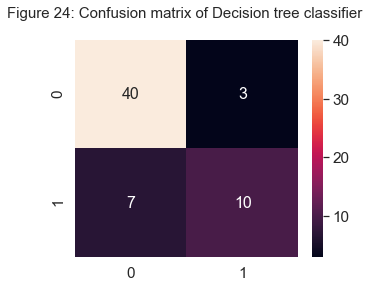

In [74]:
knnhm = pd.DataFrame(tree_cm, range(2), range(2))
plt.figure(figsize=(5,4))
sns.set(font_scale=1.4) 
sns.heatmap(knnhm, annot=True, annot_kws={"size": 16}) # font size
plt.title('Figure 24: Confusion matrix of Decision tree classifier \n', fontsize=15)
plt.show()

In [75]:
print("The depth of the tree:",fit.get_depth())

The depth of the tree: 3


In [76]:
from sklearn.tree import export_graphviz
tree = export_graphviz(classifier, 'heart_df.dot', feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking'], class_names =['Survived','Not-survived'],
                       filled = True,rounded= True, special_characters = True)

In [77]:
#run the KFlod cross validation
sumScore=0
for k, (train_index, test_index) in enumerate(kf.split(irisInstances)):
 
    X_train, X_test = irisInstances.iloc[train_index], irisInstances.iloc[test_index]
    y_train, y_test = irisTarget.iloc[train_index], irisTarget.iloc[test_index]
     
    classifier.fit(X_train, y_train)
    sumScore+= classifier.score(X_test, y_test)
    print("For fold {0} score is {1:.5f}".format(k, classifier.score(X_test, y_test)))

print("The average score is", sumScore/(k+1))


For fold 0 score is 0.76667
For fold 1 score is 0.78333
For fold 2 score is 0.74576
For fold 3 score is 0.71186
For fold 4 score is 0.72881
The average score is 0.7472881355932203


### Model comparision

#### K- nearest neighbour

In [78]:
print('Confusion matrix')
print(cm)
print('----------------------------')
print("Classification report for K-Nearest Neighbour\n")

print(classification_report(ytest, KNN_predicted))

Confusion matrix
[[40  2]
 [12  6]]
----------------------------
Classification report for K-Nearest Neighbour

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.75      0.33      0.46        18

    accuracy                           0.77        60
   macro avg       0.76      0.64      0.66        60
weighted avg       0.76      0.77      0.73        60



#### Decisoin tree classifier

In [79]:
print('Confusion matrix')
print(tree_cm)
print('----------------------------')
print("Classification report for decision tree\n")
print(Decision_tree_report)

Confusion matrix
[[40  3]
 [ 7 10]]
----------------------------
Classification report for decision tree

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.77      0.59      0.67        17

    accuracy                           0.83        60
   macro avg       0.81      0.76      0.78        60
weighted avg       0.83      0.83      0.83        60



#### Results visualisation

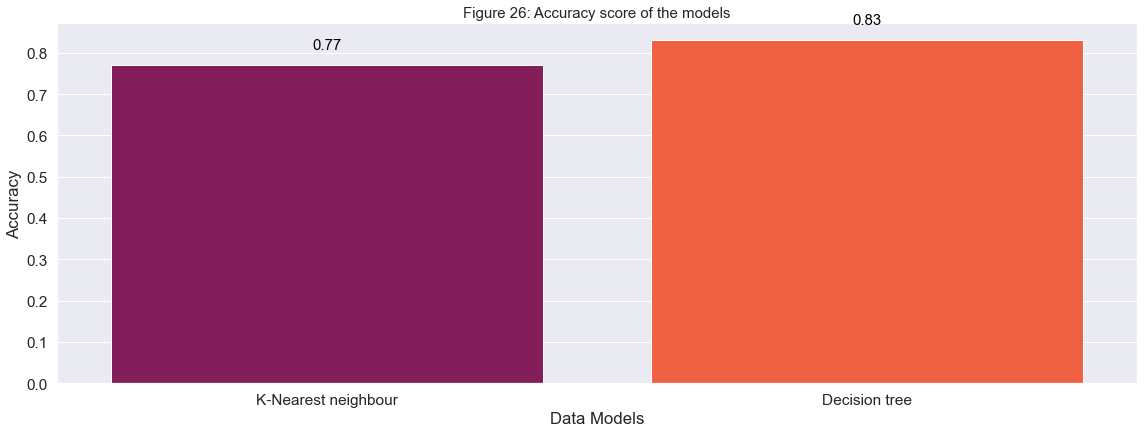

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig = plt.title('Figure 26: Accuracy score of the models', fontsize = 15)

xlabel = ['K-Nearest neighbour', 'Decision tree']

ax = sns.barplot(x=xlabel, y= [0.77,0.83], palette = "rocket", saturation =1.5)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=15, color='black', xytext=(0, 20),
                    textcoords='offset points')
plt.gcf().set_size_inches(15, 5)

plt.xlabel('Data Models');
plt.ylabel('Accuracy');
plt.show()

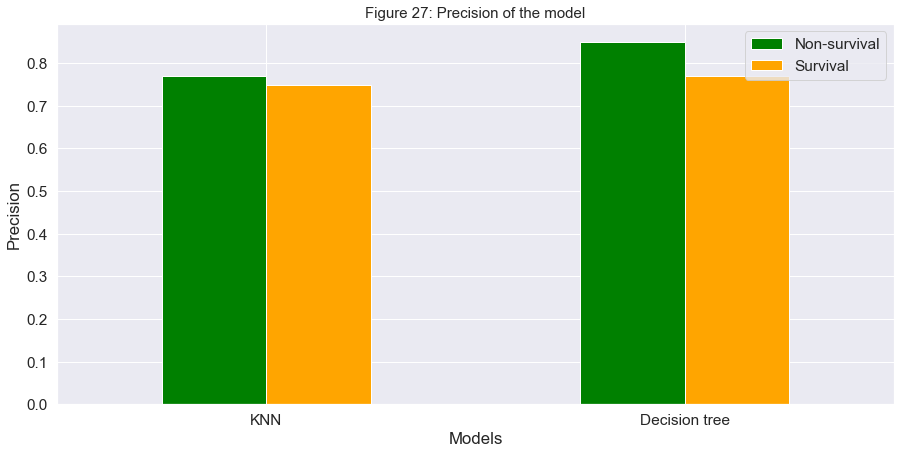

In [81]:
precision1 = [0.77, 0.85]
precision2 = [0.75, 0.77]
index = ['KNN', 'Decision tree']
df = pd.DataFrame({'Survival precision': precision1,
                    'Non-survival precision': precision2},
                  index=index)
df.plot.bar(rot=0, color={"Survival precision": "green", "Non-survival precision": "orange"})
plt.gcf().set_size_inches(15, 7)
plt.xlabel('Models');
plt.ylabel('Precision');
Legend=plt.legend(loc = "upper right")
Legend.get_texts()[1].set_text('Survival')
Legend.get_texts()[0].set_text('Non-survival')
fig = plt.title('Figure 27: Precision of the model', fontsize = 15)